In [15]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [16]:
import cv2


In [17]:
pip install opencv-python


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

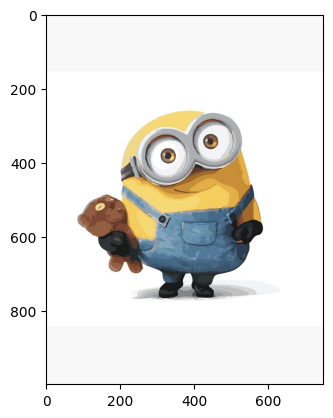

In [20]:
filename = "minion.jpg"
img = read_file(filename)

Create Edge Mask

In [21]:
def edge_mask(img, line_size, blur_value):
    """
    input: Input image
    output: Edges of Images
    """
    
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges= cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

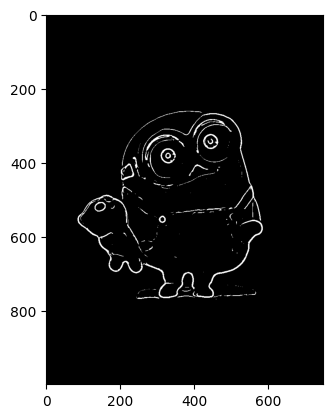

In [22]:
line_size, blur_value = 9,11
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap = "binary")
plt.show()

In [23]:
##reduce the color Palette

In [24]:
def color_quantization(img, k):
    #transform the image
    data = np.float32(img).reshape((-1,3))

    #determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TermCriteria_MAX_ITER, 20, 0.001)

    ##Implement K-means

    ret,  label , center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result= center[label.flatten()]
    result = result.reshape(img.shape)

    return result

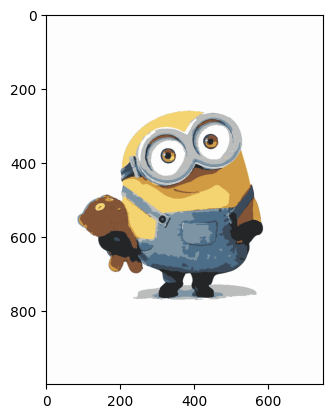

In [25]:
img_quantiz = color_quantization(img, k=9)

plt.imshow(img_quantiz)
plt.show()

Combine Edge Mask with the quantiz img

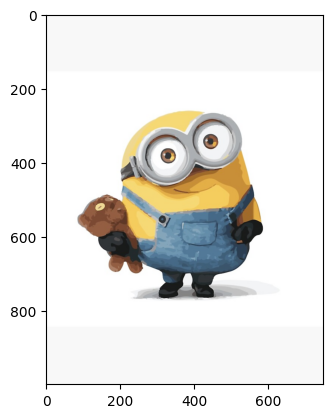

In [26]:
# reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor = 200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [27]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)
    
    plt.imshow(c)
    plt.title("CARTOONIFIED")
    plt.show()

    plt.imshow(img)
    plt.title("ORIGINAL")
    plt.show()

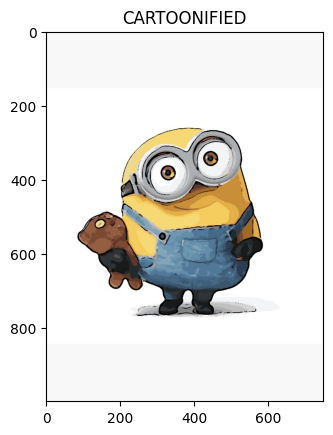

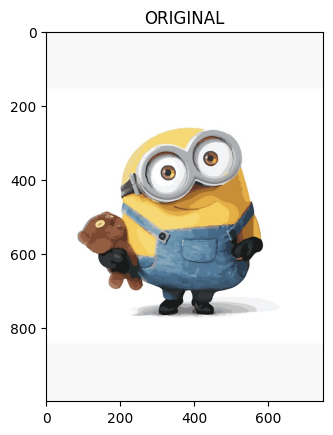

In [28]:
cartoon()